In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 
import alpro 
alpro.util.set_default_plot_params(tex=False)

### Cluster Survival Curves
This notebook contains a few example plots from cluster models of the magnetic fields with ALP probabilities calculated from their profiles.

[]

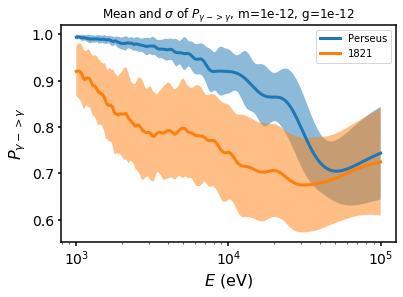

In [2]:
# initialise cluster models 
s1 = alpro.Survival("1275a")
s1.init_model()
s2 = alpro.Survival("1821")
s2.init_model()

# set axion parameters
g = 1e-12 * 1e-9   # 1e-11 GeV^-1
mass = 1e-12       # 1e-12 eV
s1.set_params(g, mass)
s2.set_params(g, mass)

# compute curves for different model instances
energies = np.logspace(3,5,1000)
N = 100
Ptot = np.zeros( (2,N,len(energies)) )
for seed in np.arange(N):
    Ptot[0,seed,:] = 1.0 - s1.get_curve(energies, seed, 500.0)
    Ptot[1,seed,:] = 1.0 - s2.get_curve(energies, seed, 500.0)

# make plots 
labels = ["Perseus", "1821"]
for i in range(2):
    P = Ptot[i,:,:]
    mean_P = np.mean(P, axis=0)
    plt.plot(energies, mean_P, label=labels[i], lw=3)
    sigma = np.std(P, axis=0)
    plt.fill_between(energies, mean_P-sigma, mean_P+sigma, alpha=0.5)

plt.xlabel("$E$ (eV)", fontsize=16)
plt.ylabel("$P_{\gamma->\gamma}$", fontsize=16)
plt.legend()
plt.title(r"Mean and $\sigma$ of $P_{{\gamma->\gamma}}$, m={}, g={}".format(mass, g/1e-9))
plt.semilogx()

[]

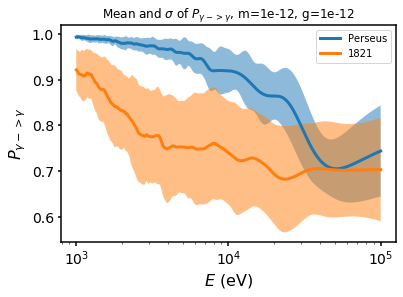

In [3]:
# re-initialise 1821 cluster model with a constant coherence length and see how things change
s2.coherence_func = 10.0

# compute curves for different model instances
for seed in np.arange(N):
    Ptot[1,seed,:] = 1.0 - s2.get_curve(energies, seed, 500.0)

labels = ["Perseus", "1821"]
for i in range(2):
    P = Ptot[i,:,:]
    mean_P = np.mean(P, axis=0)
    plt.plot(energies, mean_P, label=labels[i], lw=3)
    sigma = np.std(P, axis=0)
    plt.fill_between(energies, mean_P-sigma, mean_P+sigma, alpha=0.5)

plt.xlabel("$E$ (eV)", fontsize=16)
plt.ylabel("$P_{\gamma->\gamma}$", fontsize=16)
plt.legend()
plt.title(r"Mean and $\sigma$ of $P_{{\gamma->\gamma}}$, m={}, g={}".format(mass, g/1e-9))
plt.semilogx()

[]

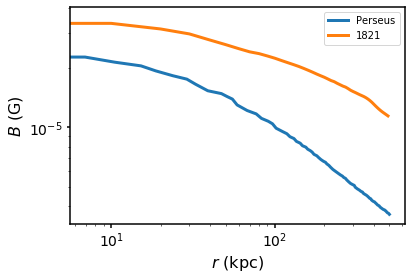

In [4]:
plt.plot(s1.domain.r, s1.domain.B, label="Perseus")
plt.plot(s2.domain.r, s2.domain.B, label="1821")
plt.xlabel("$r$ (kpc)", fontsize=16)
plt.ylabel("$B$ (G)", fontsize=16)
plt.legend()
plt.loglog()

[]

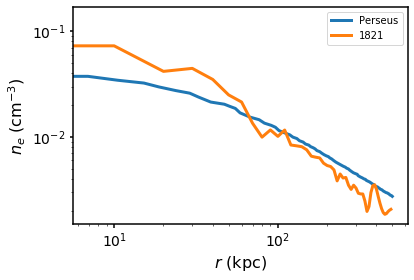

In [5]:
plt.plot(s1.domain.r, s1.domain.ne, label="Perseus")
plt.plot(s2.domain.r, s2.domain.ne, label="1821")
plt.xlabel("$r$ (kpc)", fontsize=16)
plt.ylabel("$n_e$ (cm$^{-3}$)", fontsize=16)
plt.legend()
plt.loglog()